# Assignment 15 : LGBM & XGBM

## Objective : 

To build the models using LGBM and XGBM algorithms to predict the survival status on the titanic dataset, and to compare the performance of both the models.

## Task 1 : Exploratory Data Analysis (EDA)


In [70]:
# Import the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [71]:
# Load the training dataset.
data = pd.read_csv("Titanic_train.csv")

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
# Divide the data into X and Y
X = data.drop("Survived",axis=1)

In [75]:
Y = data.Survived

In [76]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [78]:
# There are very few records in Cabin Feature so remove that features.
X.drop("Cabin",axis=1,inplace=True)

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [80]:
# Drop the Passenger Id and Name that won't contribute for the target prediction
X.drop(["PassengerId","Name"],axis=1,inplace=True)

In [81]:
X.drop("Ticket",axis=1,inplace=True)

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


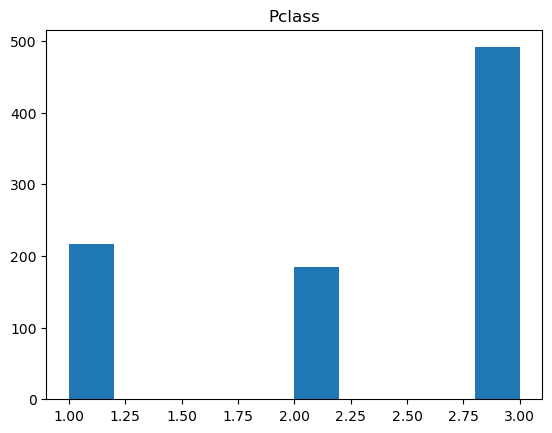

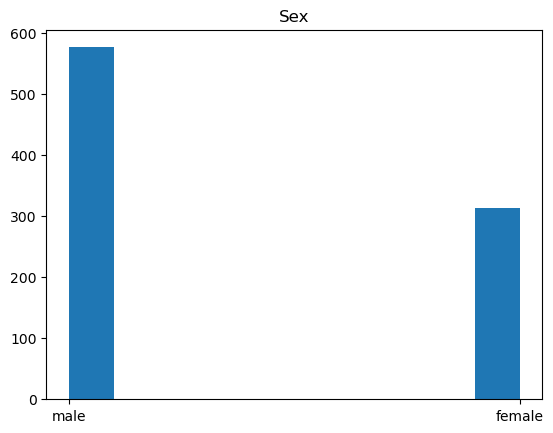

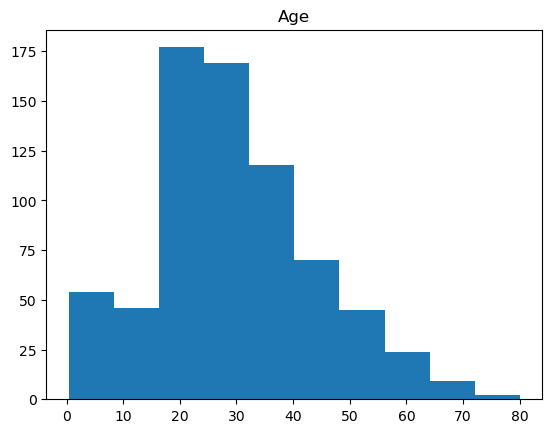

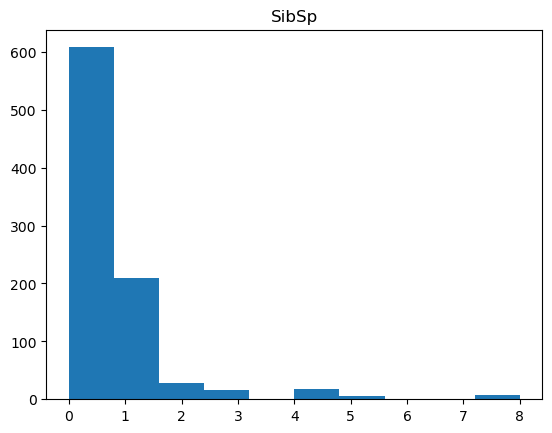

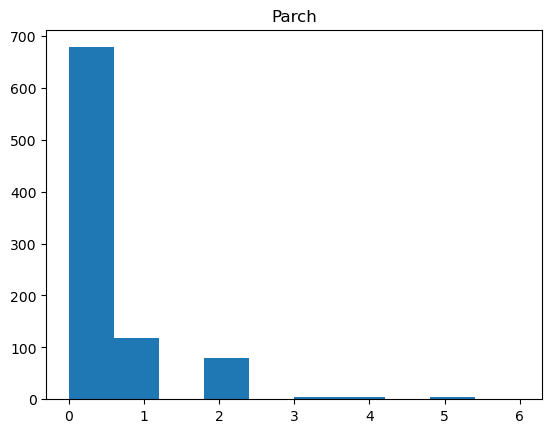

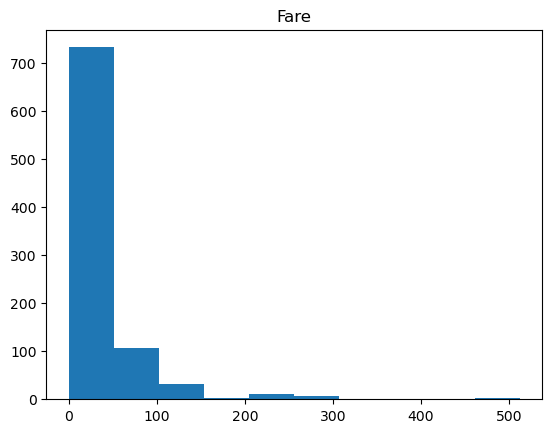

In [83]:
# Visualizing the distribution of the data in each features.
columns = X.columns.drop("Embarked")
for column in columns:
    plt.hist(X[column])
    plt.title(column)
    plt.show()

<Axes: ylabel='Age'>

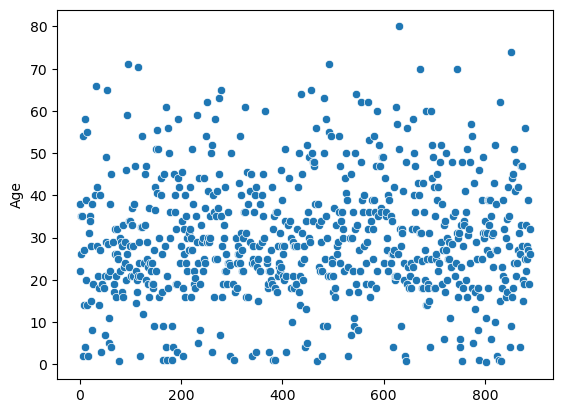

In [84]:
# PLotting Scatter plot of age.
sns.scatterplot(X['Age'])

<Axes: ylabel='Fare'>

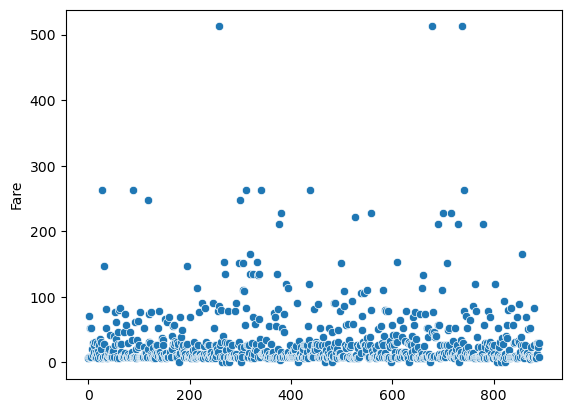

In [85]:
sns.scatterplot(X["Fare"] )

{'whiskers': [<matplotlib.lines.Line2D at 0x2def728f150>,
 'caps': [<matplotlib.lines.Line2D at 0x2def7285e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2def728f0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2def7285ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2def7287f10>],
 'means': []}

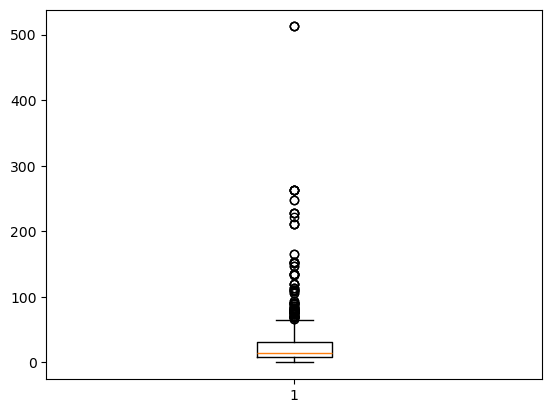

In [86]:
# Visualizing the outliers in age and fare using boxplot.

plt.boxplot(X['Fare'])

## Task 2 : Data Preprocessing

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [88]:
# Handling the missing values of Age.
# Replace the Null values in Age with mean.
mean =round(X.Age.mean())
X.Age.fillna(mean,inplace=True)

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [90]:
# Handling missing values in Embarked feature.
# Replace the missing values with mode.
X.Embarked.fillna(X.Embarked.mode()[0],inplace=True)

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [92]:
# Hence missing values are Handled.
# Convert the Sex,and Embarked data types into categorical.

X.Sex = X.Sex.astype("category")
X.Embarked = X.Embarked.astype("category")

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    int64   
 1   Sex       891 non-null    category
 2   Age       891 non-null    float64 
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Fare      891 non-null    float64 
 6   Embarked  891 non-null    category
dtypes: category(2), float64(2), int64(3)
memory usage: 36.9 KB


In [94]:
X.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [95]:
# One_hot Encoding the categorical data.
X = pd.get_dummies(X,drop_first = True)

In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 37.5 KB


In [97]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,30.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [98]:
# Standardize the data with MinMax Scaler (normalization) due to presence of categorical data.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [99]:
scaled_df = scaler.fit_transform(X)

In [100]:
X = pd.DataFrame(scaled_df,columns=X.columns)

In [101]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0
887,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,1.0,0.371701,0.125,0.333333,0.045771,0.0,0.0,1.0
889,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


In [102]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.368672,0.065376,0.063599,0.062858,0.647587,0.086420,0.725028
std,0.418036,0.163390,0.137843,0.134343,0.096995,0.477990,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000
50%,1.000000,0.371701,0.000000,0.000000,0.028213,1.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.060508,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

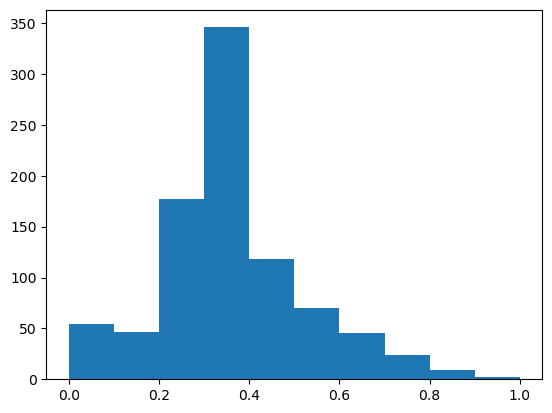

In [106]:
plt.hist(X.Age)

## Task 3 : Building Predictive Models.


### Building LGBM Model

In [108]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2 , random_state = 7)

In [109]:
print("train_x",train_x.shape)
print("train_y",train_y.shape)
print("test_x",test_x.shape)
print("test_y",test_y.shape)

train_x (712, 8)
train_y (712,)
test_x (179, 8)
test_y (179,)


In [110]:
# import LGBM algorithm
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 812.7 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 1.7 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 2.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00


In [115]:
import lightgbm as lgbm
params ={}
params["learning_rate"]=0.1
params["boosting_type"] = "gbdt"
params["objective"] ="binary"
params["metric"]="binary_logloss"
params["num_leaves"] = 10
params["max_depth"] = 5


In [116]:
params

{'learning_rate': 0.1,
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'num_leaves': 10,
 'max_depth': 5}

In [119]:
Data = lgbm.Dataset(train_x,train_y)

In [120]:
clf = lgbm.train(params,Data,1500)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [121]:
# Evaluation of the model
from sklearn.metrics import classification_report,accuracy_score

In [125]:
lgbm_train=clf.predict(train_x)

In [128]:
lgbm_train_pred = (lgbm_train >= 0.5).astype(int)


In [130]:
print(classification_report(train_y,lgbm_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       439
           1       0.99      0.95      0.97       273

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.97       712
weighted avg       0.98      0.98      0.98       712



In [131]:
lgbm_test = clf.predict(test_x)

In [132]:
lgbm_test_pred = (lgbm_test >= 0.5).astype(int)

In [134]:
print(classification_report(test_y,lgbm_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.73      0.68      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [137]:
print(np.round(accuracy_score(test_y,lgbm_test_pred)*100,2))

78.21


In [141]:
# Building the XGBM Model.

In [148]:
# install the Xgboost library
!pip install xgboost

In [149]:
import xgboost

In [153]:
import xgboost as xgb

model = xgb.XGBClassifier(
    n_estimators=200,        # Number of boosting rounds
    learning_rate=0.1,       # Learning rate
    max_depth=5,             # Maximum depth of a tree
    objective="binary:logistic",  # Objective for binary classification
    eval_metric="logloss"    # Evaluation metric for binary classification
)


In [154]:
model.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [156]:
print(classification_report(test_y,model.predict(test_x)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



In [157]:
accuracy = accuracy_score(test_y,model.predict(test_x))

In [158]:
print(np.round(accuracy*100,2))

81.56


## Task 4 : Comparative Analysis

### XGBoost (XGBM) vs. LightGBM (LGBM) Classification Performance

#### 1. **Overview**
This report compares the performance of the XGBoost (XGBM) and LightGBM (LGBM) models based on the classification report metrics: Precision, Recall, F1-Score, and Accuracy. The comparison is made using a binary classification task, with the results summarized for each metric.

#### 2. **Classification Metrics**

| Metric          | Class | XGBoost (XGBM) | LightGBM (LGBM) |
|-----------------|-------|----------------|-----------------|
| **Precision**   | 0     | 0.82           | 0.81            |
|                 | 1     | 0.81           | 0.73            |
| **Recall**      | 0     | 0.90           | 0.85            |
|                 | 1     | 0.68           | 0.68            |
| **F1-Score**    | 0     | 0.86           | 0.83            |
|                 | 1     | 0.74           | 0.71            |
| **Accuracy**    | -     | 0.82           | 0.78            |
| **Macro Avg**   | -     | 0.80           | 0.77            |
| **Weighted Avg**| -     | 0.81           | 0.78            |

#### 3. **Summary of Findings**

- **Precision**: XGBoost has a slight edge in precision for both classes, especially for class 1 (`0.81` vs. `0.73` for LGBM).
  
- **Recall**: XGBoost outperforms LightGBM in recall for class 0 (`0.90` vs. `0.85`), but both models perform equally for class 1 (`0.68`).

- **F1-Score**: XGBoost shows better F1-scores for both classes. The improvement is more significant for class 1 (`0.74` vs. `0.71` for LGBM).

- **Accuracy**: XGBoost achieves a higher overall accuracy (`0.82` vs. `0.78` for LGBM).

- **Macro Average**: XGBoost has a higher macro average for precision, recall, and F1-score, indicating a better balance between the two classes.

- **Weighted Average**: XGBoost also has higher weighted averages across all metrics, reinforcing its overall better performance on this dataset.

#### 4. **Conclusion**
- **XGBoost (XGBM)**: The XGBoost model shows better performance across all key metrics, making it a stronger choice for this classification task, particularly in terms of precision and F1-score for class 1, as well as overall accuracy.

- **LightGBM (LGBM)**: While LightGBM is slightly behind XGBoost in this comparison, it still performs well and could be a viable option.